# Load data

In [13]:
import os
import pandas as pd

data_path = "../data/results"
bart_ft_res = pd.read_csv(os.path.join(data_path,"bart-ft-results.csv"))
llama_ft_res = pd.read_csv(os.path.join(data_path,"llama-ft-results.csv"))
llama_instr_res = pd.read_csv(os.path.join(data_path,"llama-instruct-few-shot-results.csv"))

In [15]:
bart_ft_res.columns

Index(['dataset', 'base-b1', 'base-b2', 'masked-b1', 'masked-b2', 'subject-b1',
       'subject-b2', 'target-phrase-b1', 'target-phrase-b2', 'target-sent-b1',
       'target-sent-b2', 'target-sent-target-b1', 'target-sent-target-b2',
       'target-sent-subject-b1', 'target-sent-subject-b2', 'base-bsprec',
       'masked-bsprec', 'subject-bsprec', 'target-phrase-bsprec',
       'target-sent-bsprec', 'target-sent-target-bsprec',
       'target-sent-subject-bsprec', 'base-bsrec', 'masked-bsrec',
       'subject-bsrec', 'target-phrase-bsrec', 'target-sent-bsrec',
       'target-sent-target-bsrec', 'target-sent-subject-bsrec', 'base-bsf1',
       'masked-bsf1', 'subject-bsf1', 'target-phrase-bsf1', 'target-sent-bsf1',
       'target-sent-target-bsf1', 'target-sent-subject-bsf1', 'base-bartscore',
       'masked-bartscore', 'subject-bartscore', 'target-phrase-bartscore',
       'target-sent-bartscore', 'target-sent-target-bartscore',
       'target-sent-subject-bartscore'],
      dtype='obj

# Results

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# score type: b1 - bleu 1 , b2 - bleu2
def preprocess_dataframe(df, score_type, model_name):
    """
    Preprocess the DataFrame to filter only columns ending with '-b1' and rename them with the model name.

    """
    # filter columns that end with '-b1' along with the 'dataset' column
    filtered_df = df[['dataset'] + [col for col in df.columns if col.endswith(f'-{score_type}')]]
    
    # rename the columns to include the model name
    filtered_df = filtered_df.rename(columns={col: f"{model_name}_{col}" for col in filtered_df.columns if col != 'dataset'})
    
    return filtered_df

def merge_dataframes(dfs):
    """
    Merge multiple DataFrames on the 'dataset' column.
    
    """
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on='dataset')
    return merged_df

bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-b1,bart-ft_masked-b1,bart-ft_subject-b1,bart-ft_target-phrase-b1,bart-ft_target-sent-b1,bart-ft_target-sent-target-b1,bart-ft_target-sent-subject-b1,llama-ft_base-b1,llama-ft_masked-b1,...,llama-ft_target-sent-b1,llama-ft_target-sent-target-b1,llama-ft_target-sent-subject-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_masked-b1,llama-instr-few-shot_subject-b1,llama-instr-few-shot_target-phrase-b1,llama-instr-few-shot_target-sent-b1,llama-instr-few-shot_target-sent-target-b1,llama-instr-few-shot_target-sent-subject-b1
0,c2s,20.127,18.792,30.405,21.887,22.931,23.814,31.640,22.070,22.447,...,22.276,23.304,29.088,15.899,15.258,22.277,18.347,17.417,18.736,23.132
1,c2sp,19.784,20.500,31.428,21.611,21.291,23.323,32.585,20.439,22.299,...,21.514,22.975,30.110,15.266,15.757,23.580,18.686,18.003,18.802,21.920
2,c4s,19.593,19.678,32.311,21.622,21.107,23.052,32.391,23.374,23.978,...,22.483,24.077,30.140,15.712,14.908,22.771,17.560,18.005,17.028,22.052
3,c4sp,18.544,20.353,30.628,20.773,21.272,24.881,32.564,20.691,21.377,...,22.514,26.533,30.210,15.233,16.923,23.323,18.652,16.861,18.472,21.453
4,cs,21.549,NaN,30.854,22.099,21.549,22.099,30.854,22.577,NaN,...,22.577,22.365,27.416,19.650,NaN,20.256,18.037,19.650,18.037,20.256


In [17]:
import matplotlib.pyplot as plt

def compare_setting(dataframe, score_type, dataset_column, column_type, title="Comparison by Type"):
    """
    Creates a line graph comparing models based on a specific column type (e.g., 'base-b1').

    """

    filtered_columns = [col for col in dataframe.columns if col.split('_')[-1] == column_type]

    # line graph
    plt.figure(figsize=(12, 6))
    for col in filtered_columns:
        plt.plot(dataframe[dataset_column], dataframe[col], marker='o', label=col.split('_')[0])

        # find the highest score for the current model
        max_idx = dataframe[col].idxmax()
        max_score = dataframe[col].iloc[max_idx]
        max_dataset = dataframe[dataset_column].iloc[max_idx]

        plt.text(
            x=max_dataset,
            y=max_score,
            s=f"{max_score:.3f}",
            fontsize=10,
            color="black",
            ha="center",
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="yellow", alpha=0.7)
        )

    # set labels, title, and legend
    plt.xlabel("Dataset")
    plt.ylabel(f"{score_type} Score")
    plt.title(title)
    plt.legend(title="Models", loc="best")

    # display grid
    plt.grid(True)
    plt.show()

## BLEU-1 Score

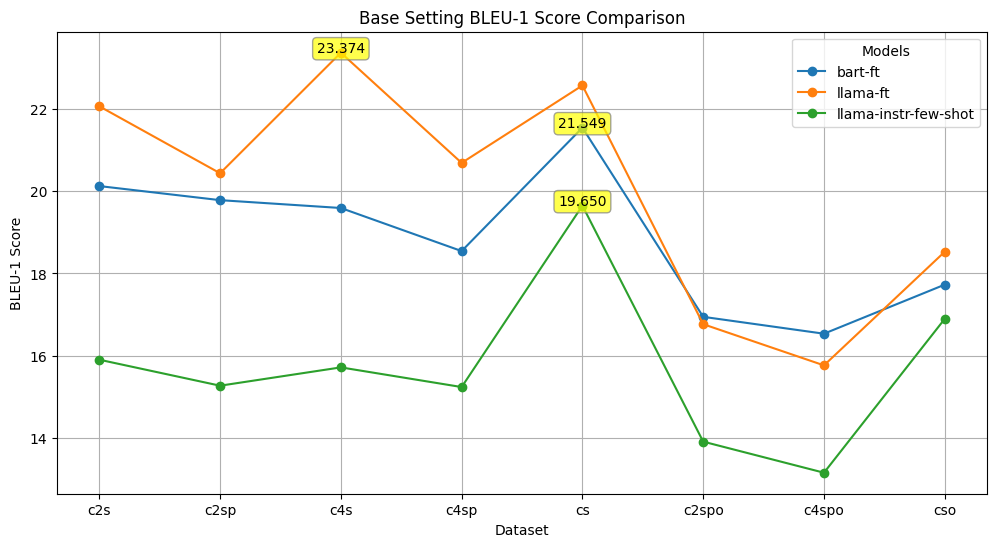

In [5]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='base-b1',
    title="Base Setting BLEU-1 Score Comparison"
)

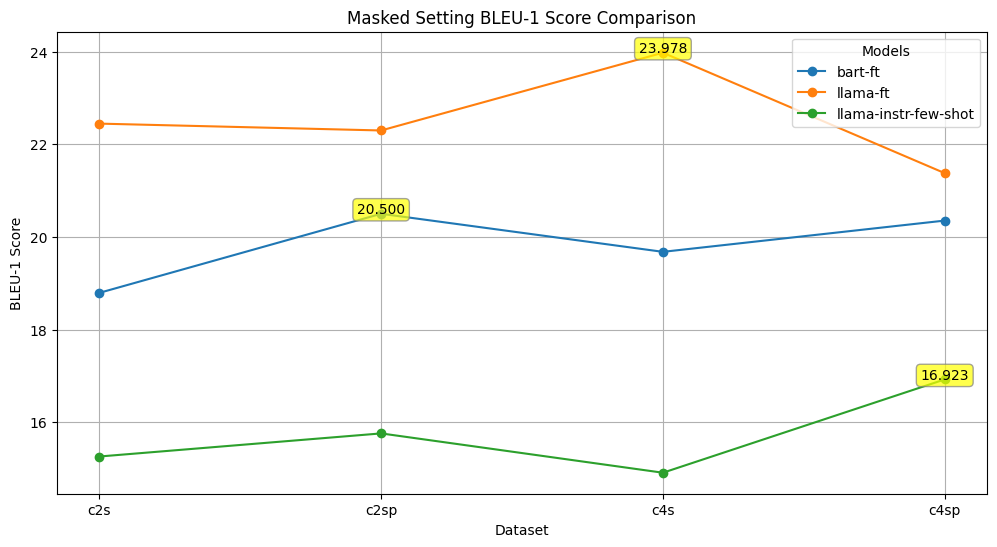

In [6]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='masked-b1',
    title="Masked Setting BLEU-1 Score Comparison"
)

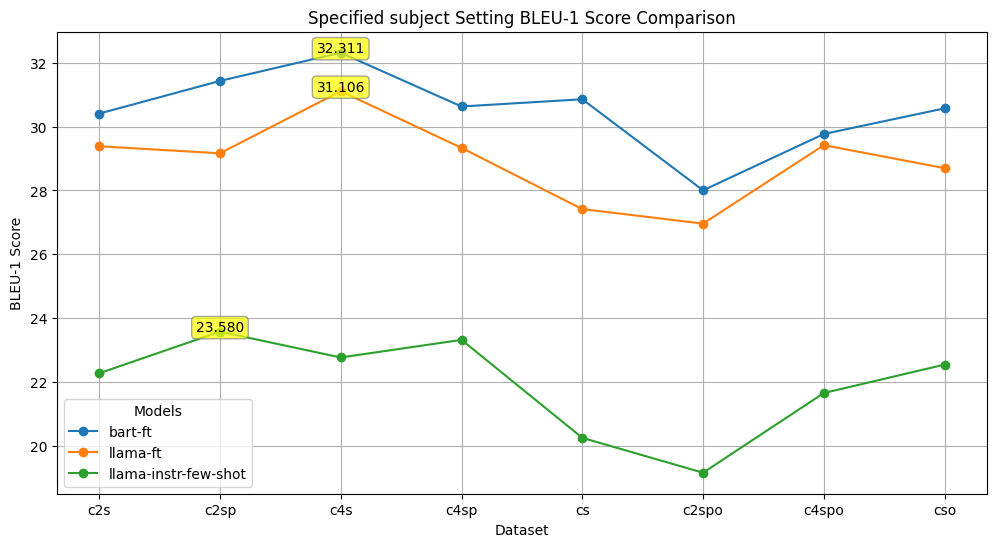

In [18]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='subject-b1',
    title="Specified subject Setting BLEU-1 Score Comparison"
)

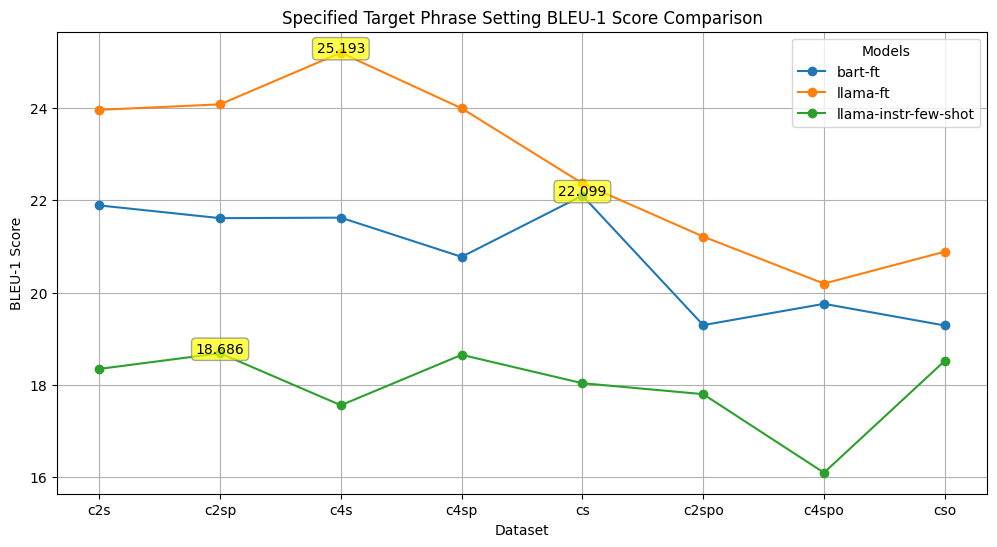

In [19]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-phrase-b1',
    title="Specified Target Phrase Setting BLEU-1 Score Comparison"
)

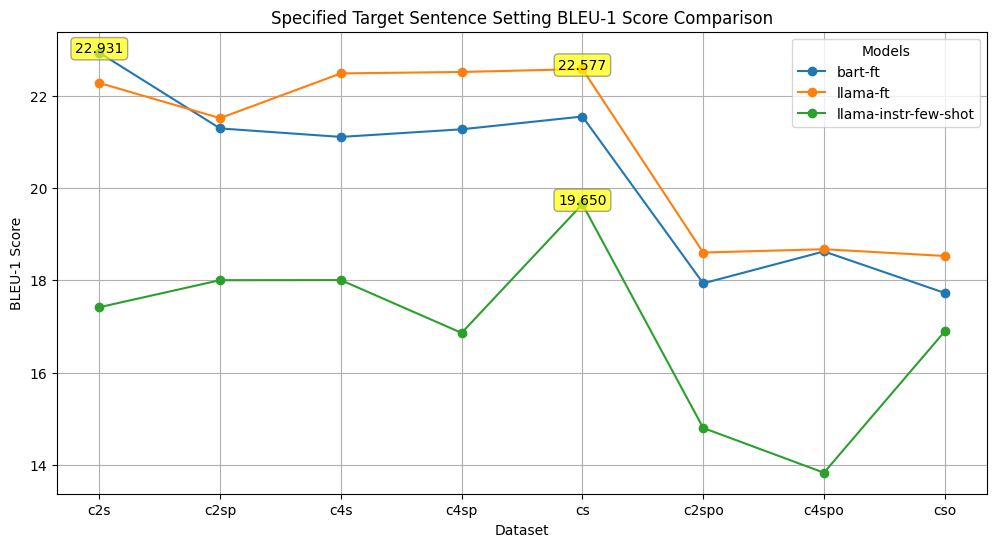

In [20]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-sent-b1',
    title="Specified Target Sentence Setting BLEU-1 Score Comparison"
)

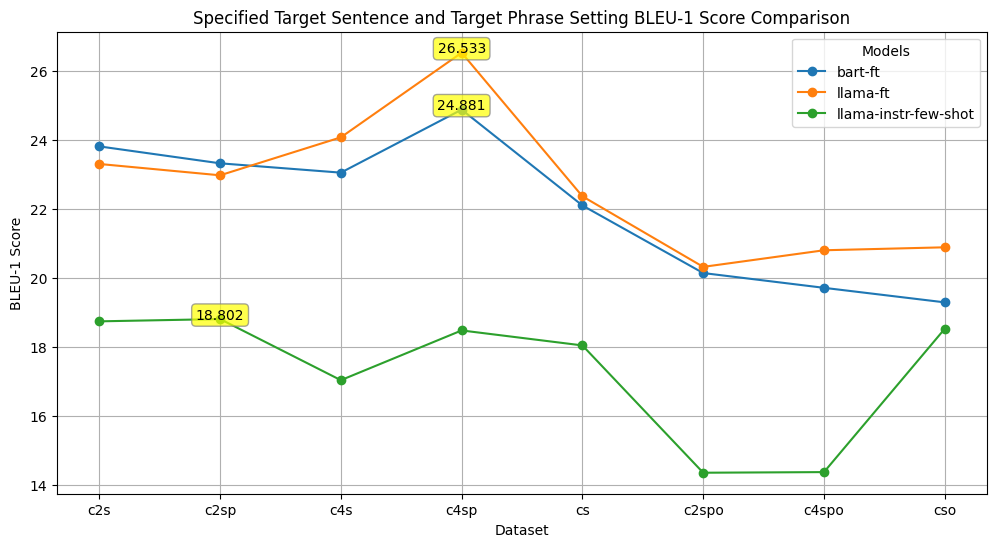

In [10]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-sent-target-b1',
    title="Specified Target Sentence and Target Phrase Setting BLEU-1 Score Comparison"
)

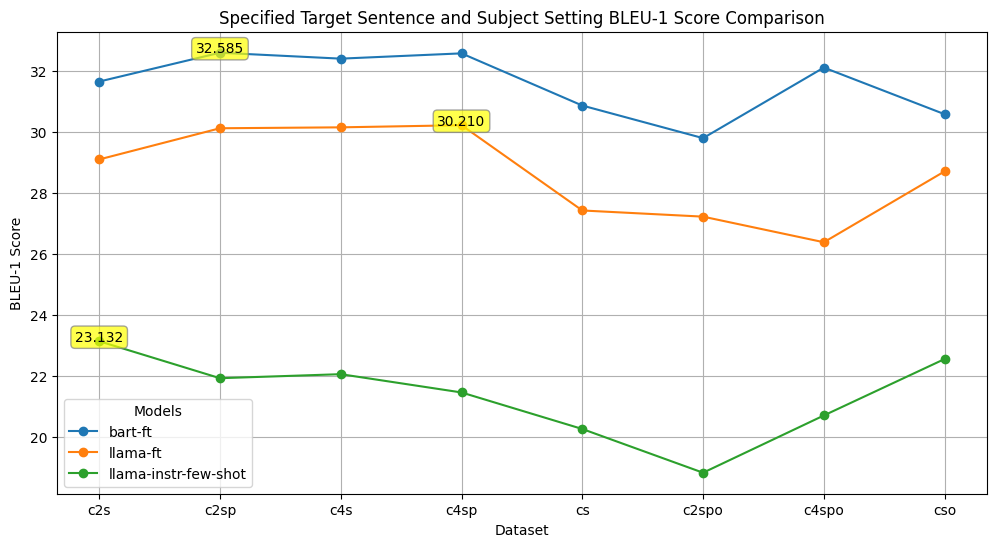

In [21]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-sent-subject-b1',
    title="Specified Target Sentence and Subject Setting BLEU-1 Score Comparison"
)

## BLEU-2 Score

In [22]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "b2", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b2", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b2","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-b2,bart-ft_masked-b2,bart-ft_subject-b2,bart-ft_target-phrase-b2,bart-ft_target-sent-b2,bart-ft_target-sent-target-b2,bart-ft_target-sent-subject-b2,llama-ft_base-b2,llama-ft_masked-b2,...,llama-ft_target-sent-b2,llama-ft_target-sent-target-b2,llama-ft_target-sent-subject-b2,llama-instr-few-shot_base-b2,llama-instr-few-shot_masked-b2,llama-instr-few-shot_subject-b2,llama-instr-few-shot_target-phrase-b2,llama-instr-few-shot_target-sent-b2,llama-instr-few-shot_target-sent-target-b2,llama-instr-few-shot_target-sent-subject-b2
0,c2s,6.451,4.865,19.002,9.306,11.731,12.907,20.938,9.862,9.638,...,9.907,10.340,14.827,3.588,3.309,8.939,5.923,4.275,5.026,9.425
1,c2sp,6.257,8.371,20.317,9.859,10.529,12.275,21.927,8.020,9.604,...,9.011,10.261,15.480,3.515,3.567,9.417,5.726,5.752,5.967,8.443
2,c4s,6.638,6.381,20.601,9.662,10.121,12.792,21.728,9.504,9.615,...,10.633,10.195,15.763,2.912,4.157,8.681,5.348,4.865,4.881,8.871
3,c4sp,6.585,7.890,19.846,10.017,10.893,13.791,21.634,8.296,8.435,...,8.989,12.639,15.876,1.652,4.930,9.918,5.758,4.754,6.361,8.484
4,cs,10.119,NaN,19.994,10.541,10.119,10.541,19.994,9.762,NaN,...,9.762,9.619,14.308,6.692,NaN,8.236,5.936,6.692,5.936,8.236


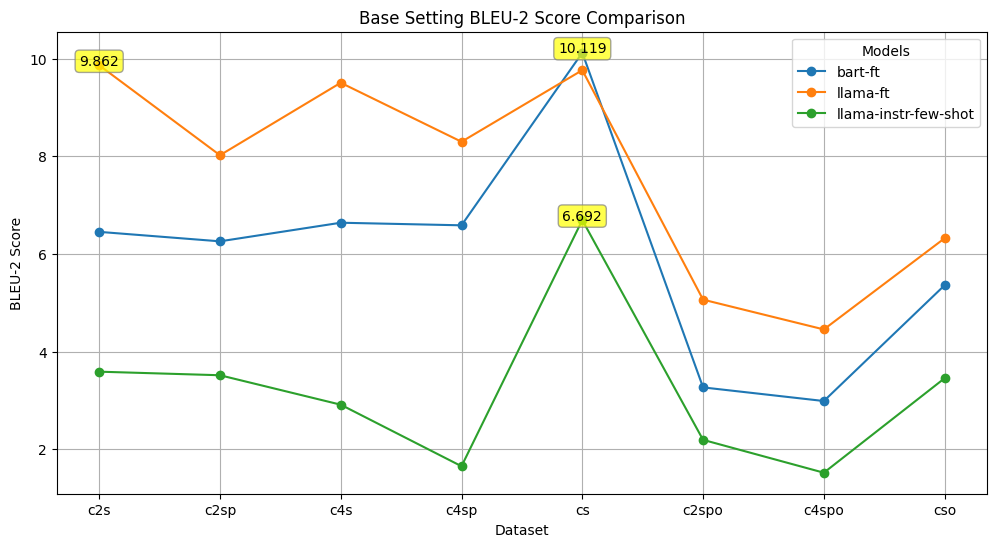

In [23]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='base-b2',
    title="Base Setting BLEU-2 Score Comparison"
)

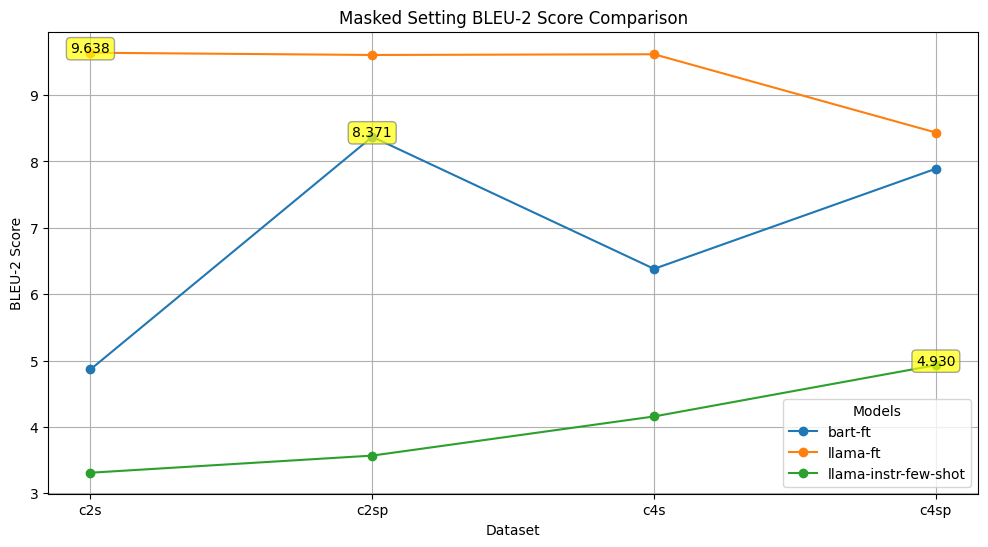

In [24]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='masked-b2',
    title="Masked Setting BLEU-2 Score Comparison"
)

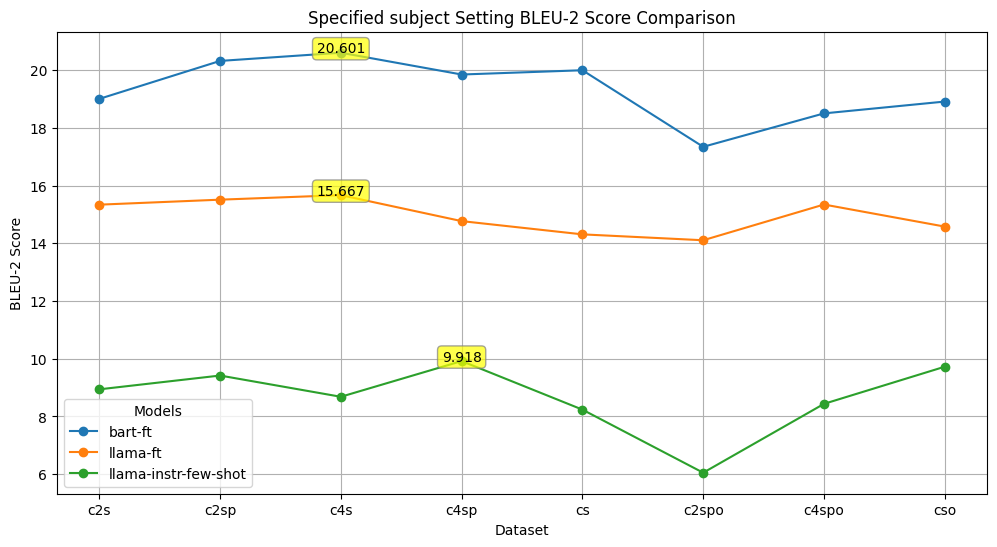

In [25]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='subject-b2',
    title="Specified subject Setting BLEU-2 Score Comparison"
)

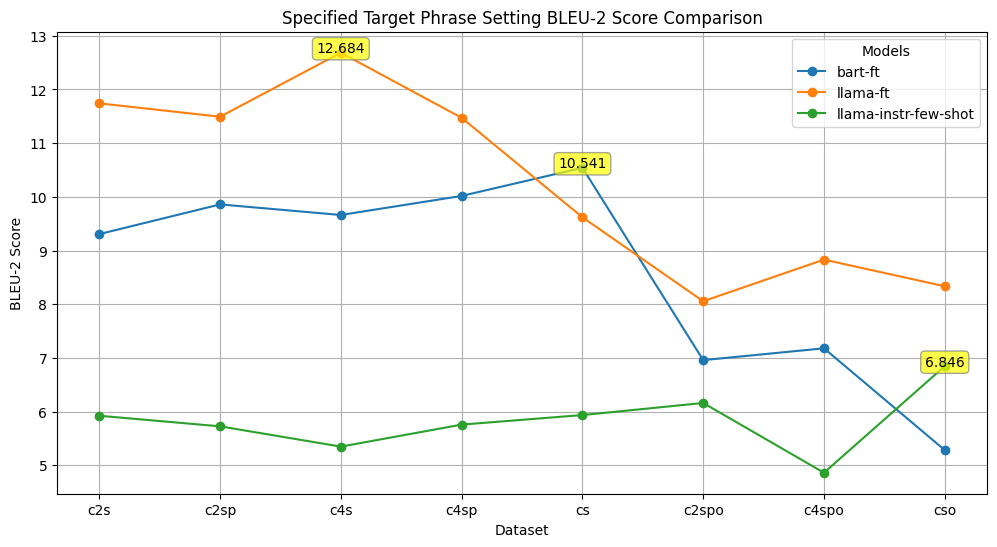

In [26]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-phrase-b2',
    title="Specified Target Phrase Setting BLEU-2 Score Comparison"
)

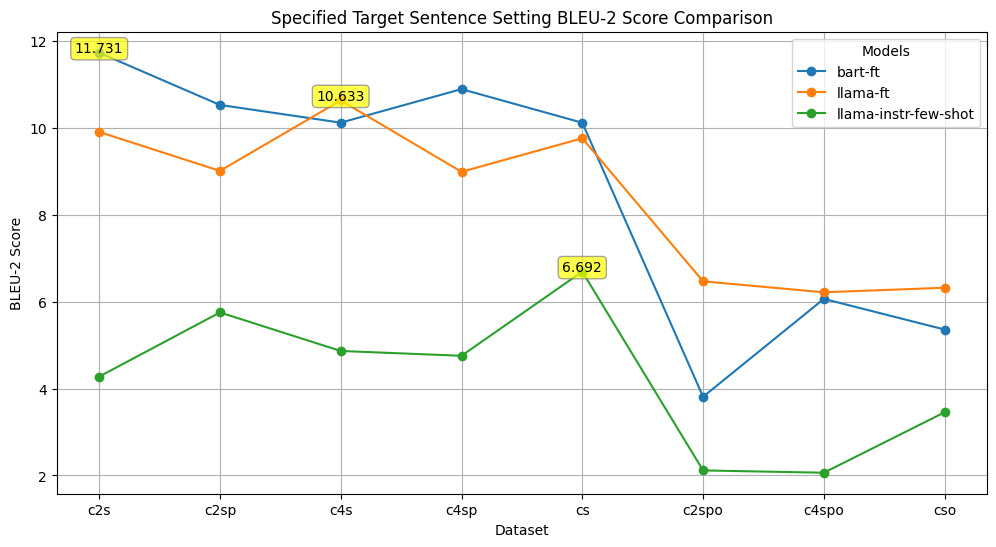

In [27]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-sent-b2',
    title="Specified Target Sentence Setting BLEU-2 Score Comparison"
)

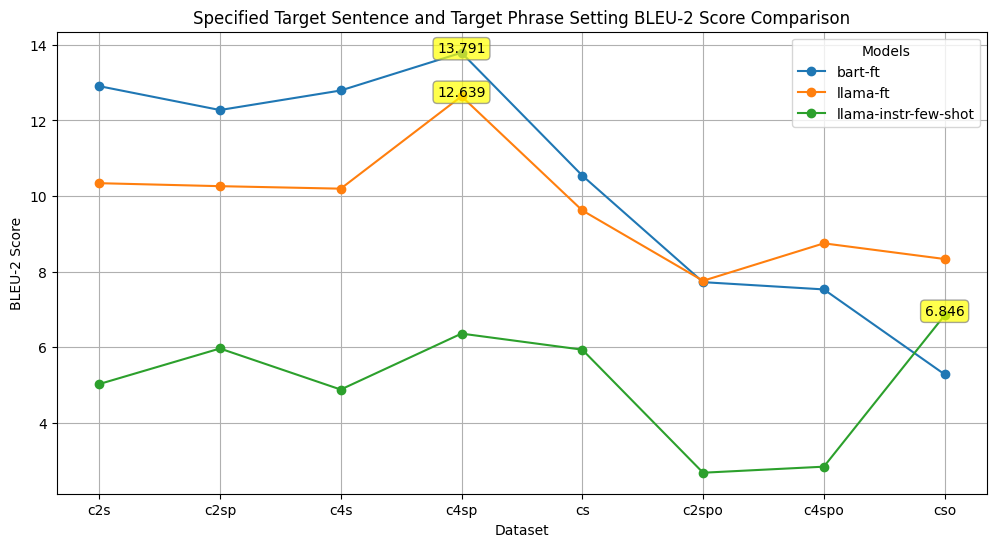

In [28]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-sent-target-b2',
    title="Specified Target Sentence and Target Phrase Setting BLEU-2 Score Comparison"
)

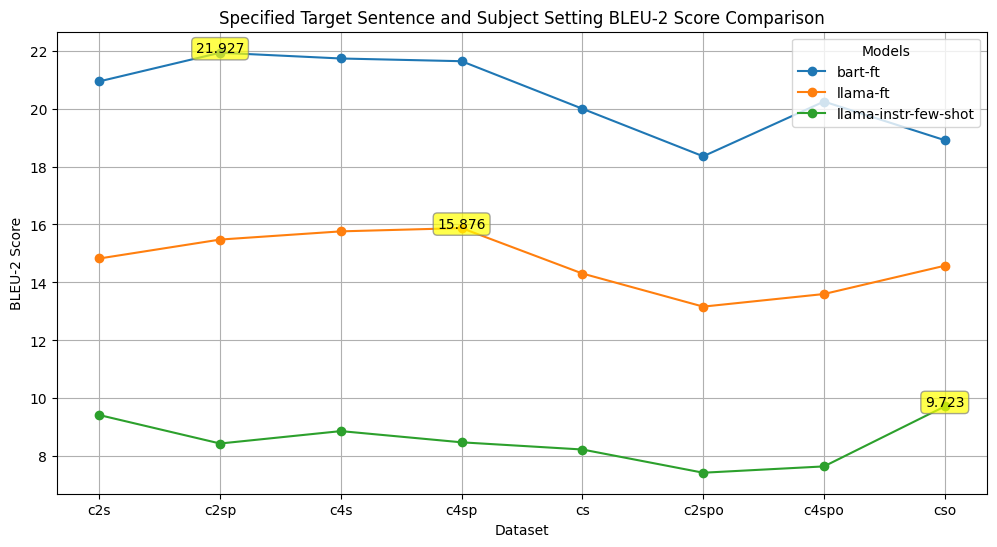

In [29]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-sent-subject-b2',
    title="Specified Target Sentence and Subject Setting BLEU-2 Score Comparison"
)

## BERTScore

In [34]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-bsf1,bart-ft_masked-bsf1,bart-ft_subject-bsf1,bart-ft_target-phrase-bsf1,bart-ft_target-sent-bsf1,bart-ft_target-sent-target-bsf1,bart-ft_target-sent-subject-bsf1,llama-ft_base-bsf1,llama-ft_masked-bsf1,...,llama-ft_target-sent-bsf1,llama-ft_target-sent-target-bsf1,llama-ft_target-sent-subject-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_masked-bsf1,llama-instr-few-shot_subject-bsf1,llama-instr-few-shot_target-phrase-bsf1,llama-instr-few-shot_target-sent-bsf1,llama-instr-few-shot_target-sent-target-bsf1,llama-instr-few-shot_target-sent-subject-bsf1
0,c2s,0.468,0.461,0.559,0.488,0.492,0.505,0.574,0.501,0.503,...,0.507,0.508,0.550,0.475,0.462,0.510,0.488,0.485,0.490,0.521
1,c2sp,0.487,0.489,0.566,0.508,0.492,0.504,0.574,0.482,0.507,...,0.499,0.507,0.558,0.456,0.466,0.515,0.494,0.484,0.498,0.515
2,c4s,0.470,0.471,0.573,0.493,0.491,0.500,0.572,0.499,0.500,...,0.508,0.512,0.556,0.461,0.469,0.513,0.485,0.484,0.487,0.518
3,c4sp,0.470,0.491,0.566,0.512,0.500,0.519,0.568,0.479,0.493,...,0.499,0.526,0.564,0.447,0.456,0.520,0.491,0.481,0.499,0.517
4,cs,0.496,NaN,0.567,0.502,0.496,0.502,0.567,0.502,NaN,...,0.502,0.503,0.549,0.487,NaN,0.518,0.481,0.487,0.481,0.518


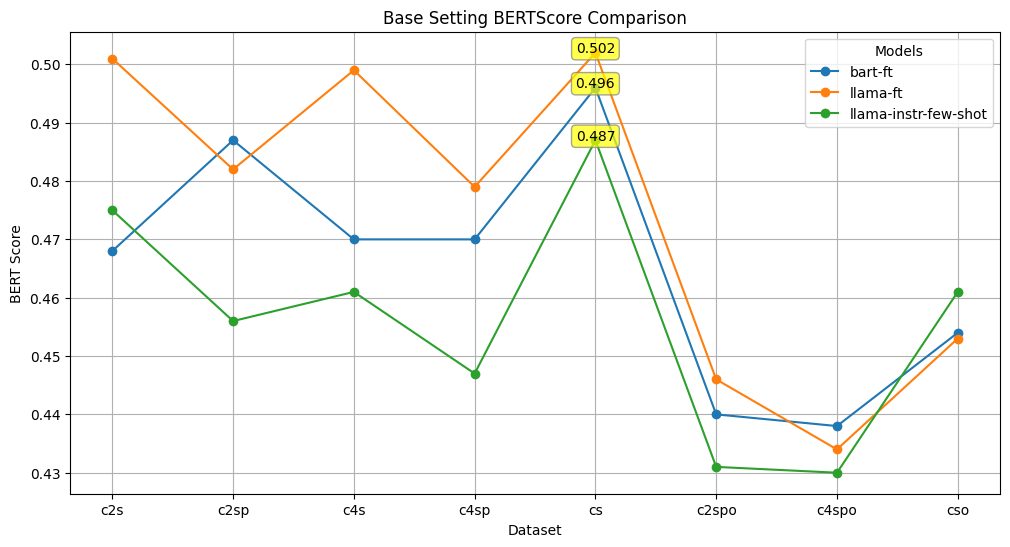

In [35]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='base-bsf1',
    title="Base Setting BERTScore Comparison"
)

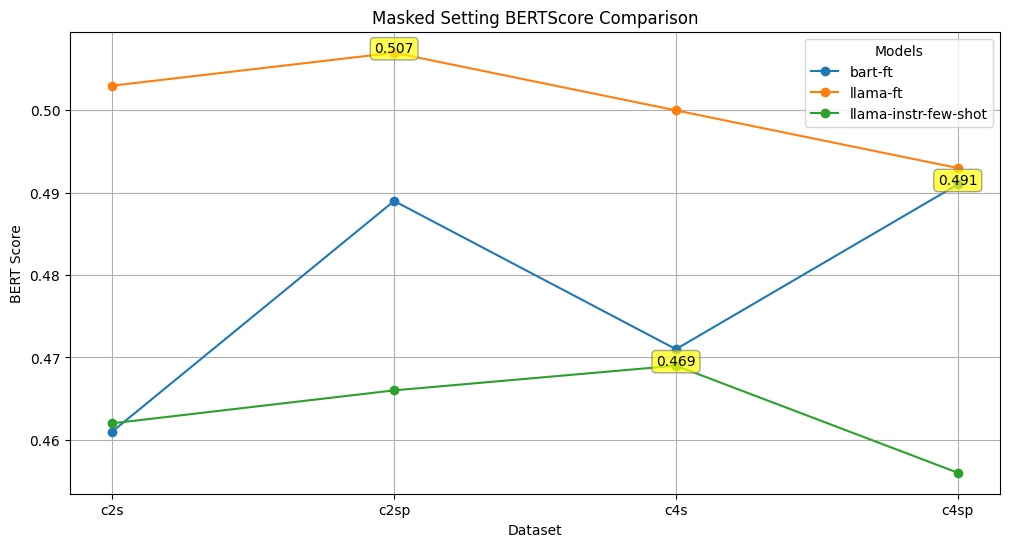

In [36]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='masked-bsf1',
    title="Masked Setting BERTScore Comparison"
)

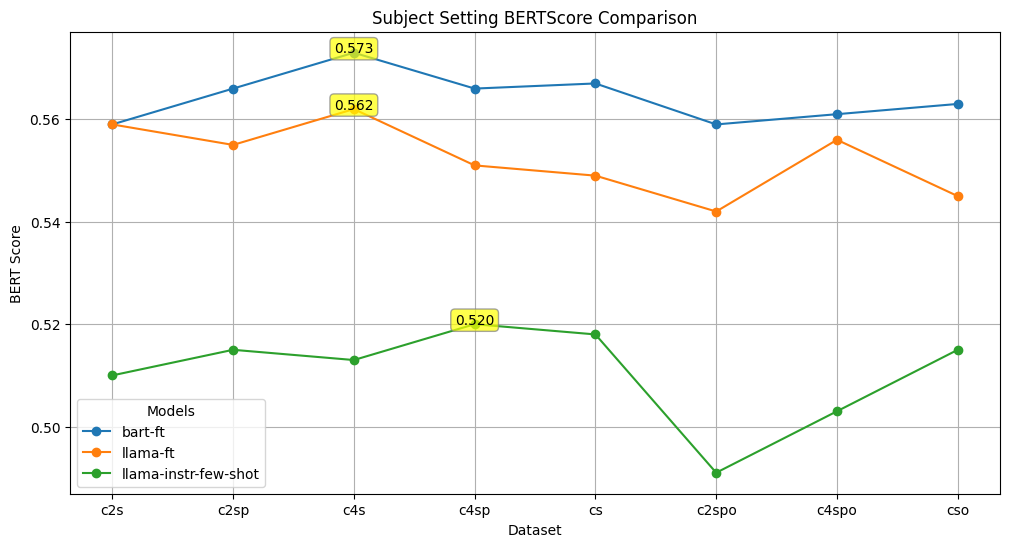

In [37]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='subject-bsf1',
    title="Subject Setting BERTScore Comparison"
)

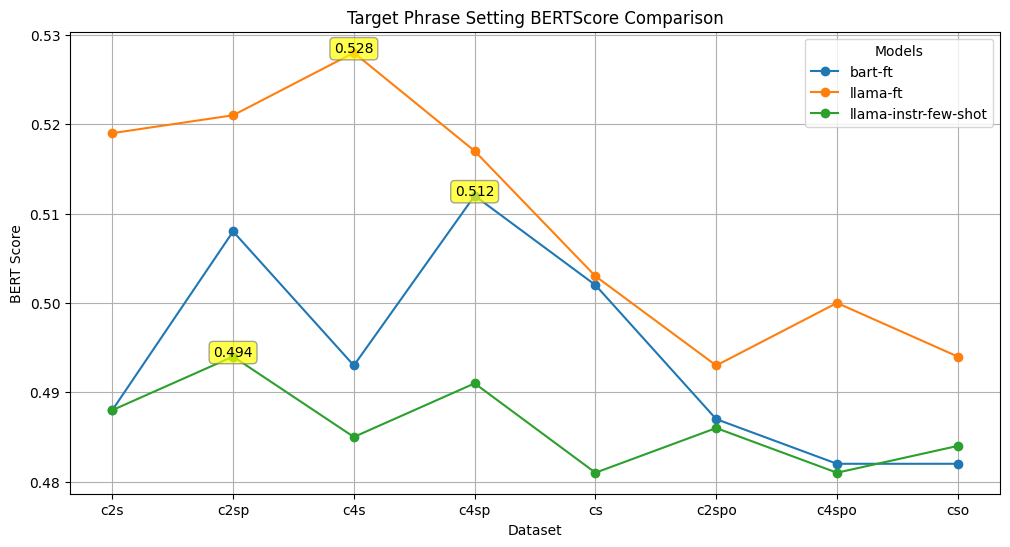

In [38]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-phrase-bsf1',
    title="Target Phrase Setting BERTScore Comparison"
)

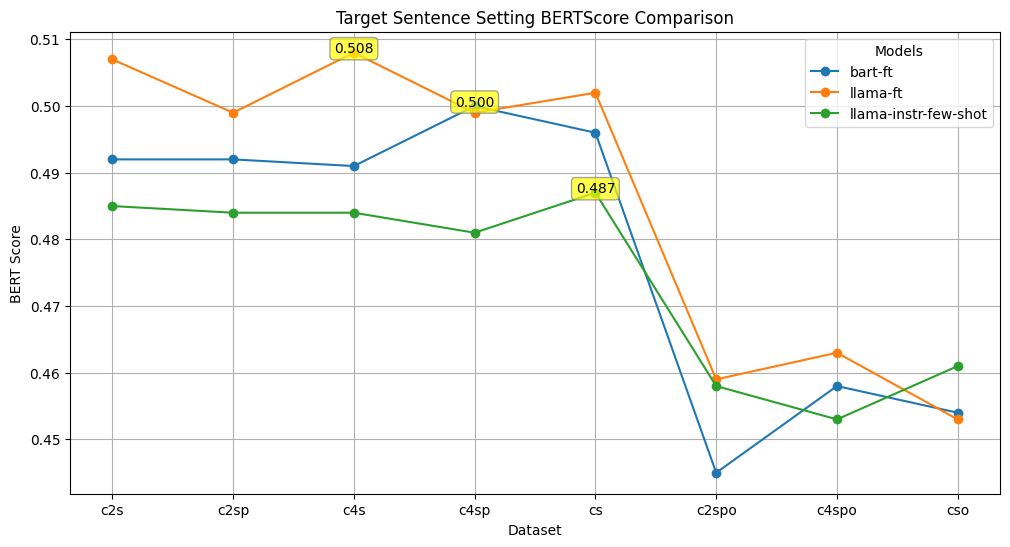

In [39]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-sent-bsf1',
    title="Target Sentence Setting BERTScore Comparison"
)

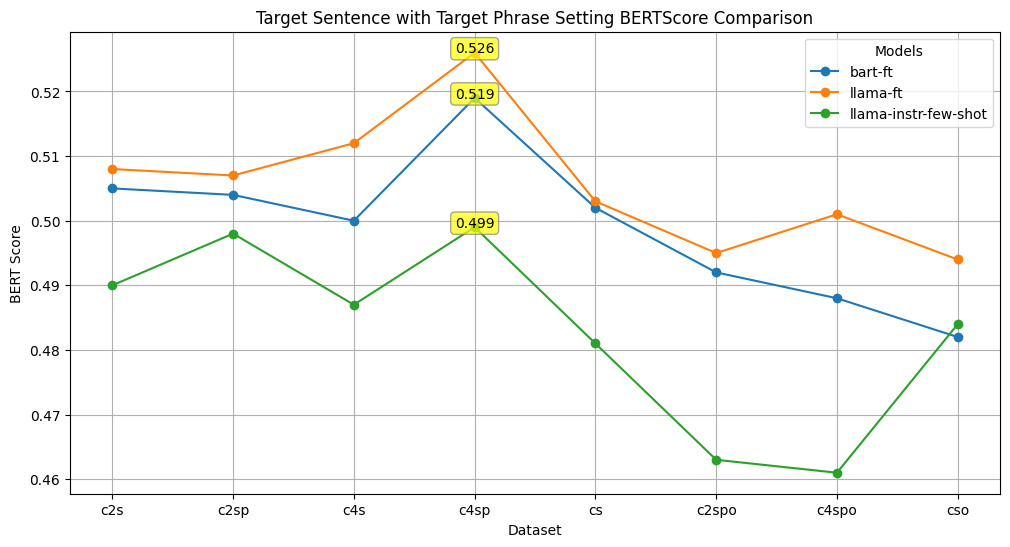

In [40]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-sent-target-bsf1',
    title="Target Sentence with Target Phrase Setting BERTScore Comparison"
)

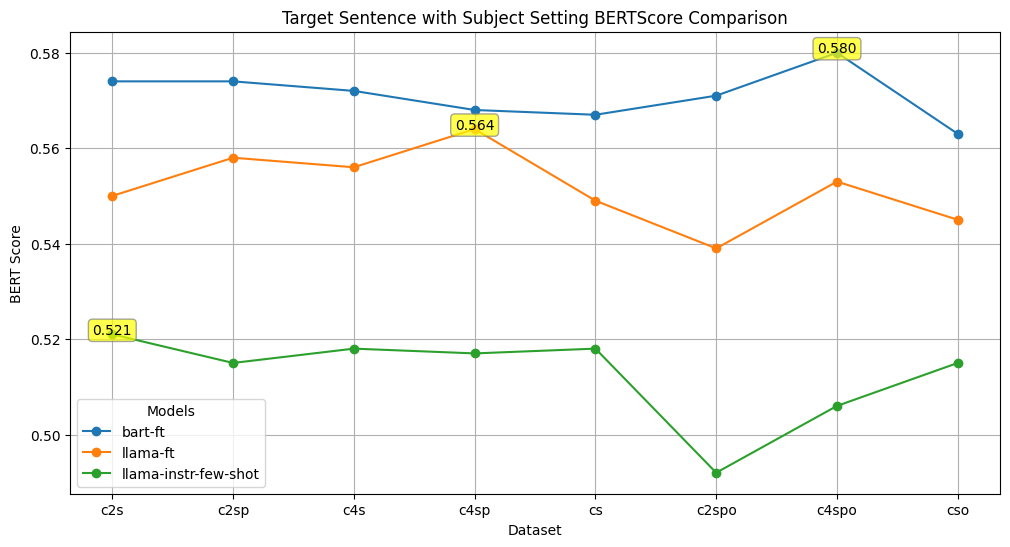

In [41]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-sent-subject-bsf1',
    title="Target Sentence with Subject Setting BERTScore Comparison"
)

## BARTScore
https://huggingface.co/posts/santiviquez/809039256258115

In [42]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-bartscore,bart-ft_masked-bartscore,bart-ft_subject-bartscore,bart-ft_target-phrase-bartscore,bart-ft_target-sent-bartscore,bart-ft_target-sent-target-bartscore,bart-ft_target-sent-subject-bartscore,llama-ft_base-bartscore,llama-ft_masked-bartscore,...,llama-ft_target-sent-bartscore,llama-ft_target-sent-target-bartscore,llama-ft_target-sent-subject-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_masked-bartscore,llama-instr-few-shot_subject-bartscore,llama-instr-few-shot_target-phrase-bartscore,llama-instr-few-shot_target-sent-bartscore,llama-instr-few-shot_target-sent-target-bartscore,llama-instr-few-shot_target-sent-subject-bartscore
0,c2s,-3.438,-3.465,-2.954,-3.289,-3.363,-3.293,-2.912,-3.328,-3.340,...,-3.313,-3.252,-3.025,-3.778,-3.809,-3.487,-3.552,-3.549,-3.534,-3.293
1,c2sp,-3.406,-3.396,-2.930,-3.285,-3.405,-3.296,-2.876,-3.393,-3.273,...,-3.271,-3.247,-2.938,-3.849,-3.820,-3.475,-3.485,-3.546,-3.504,-3.364
2,c4s,-3.395,-3.396,-2.906,-3.231,-3.339,-3.326,-2.898,-3.344,-3.341,...,-3.265,-3.252,-2.979,-3.884,-3.788,-3.493,-3.577,-3.599,-3.551,-3.362
3,c4sp,-3.386,-3.363,-2.952,-3.292,-3.364,-3.249,-2.892,-3.358,-3.328,...,-3.308,-3.219,-2.938,-3.941,-3.943,-3.440,-3.516,-3.554,-3.464,-3.356
4,cs,-3.343,NaN,-2.965,-3.289,-3.343,-3.289,-2.965,-3.318,NaN,...,-3.318,-3.288,-3.018,-3.427,NaN,-3.298,-3.481,-3.427,-3.481,-3.298


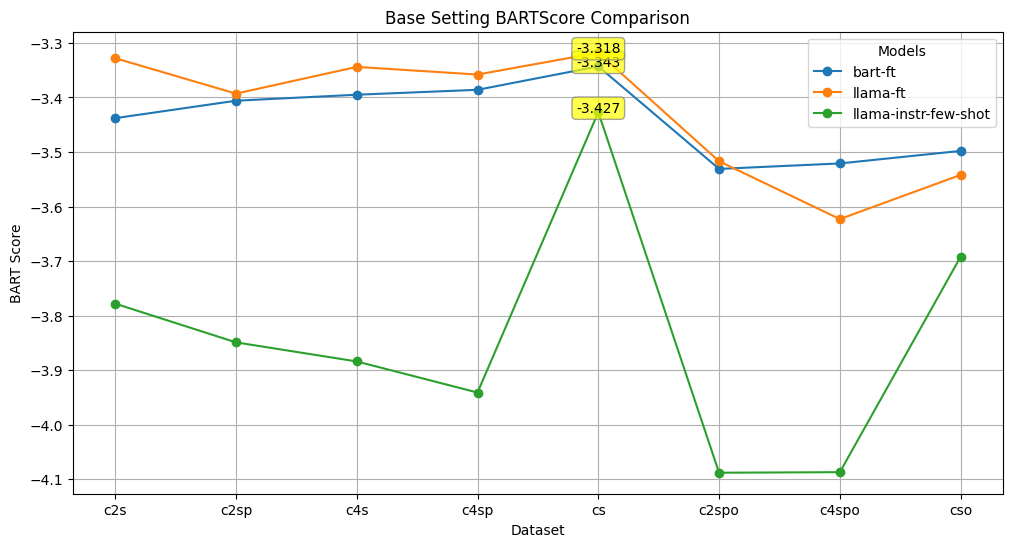

In [43]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='base-bartscore',
    title="Base Setting BARTScore Comparison"
)

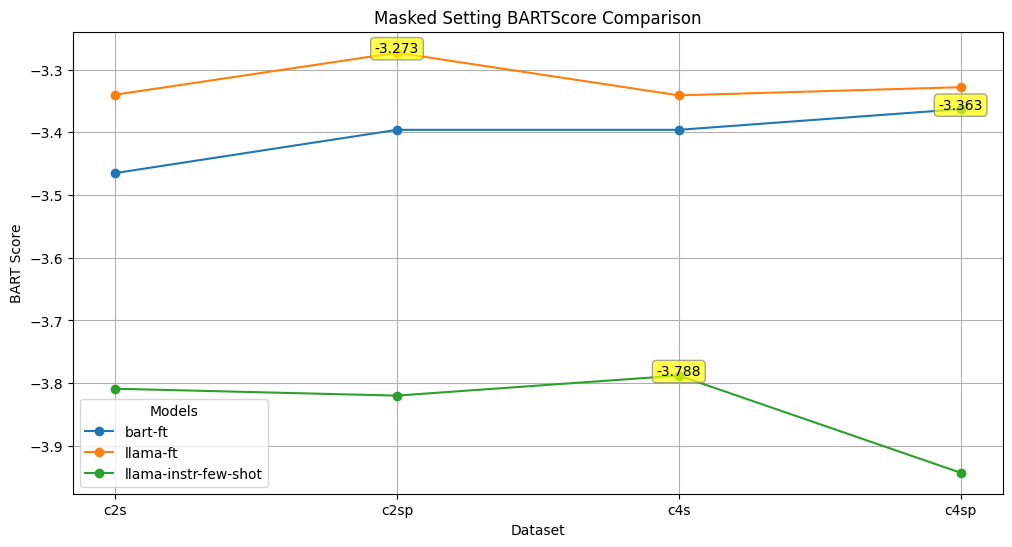

In [44]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='masked-bartscore',
    title="Masked Setting BARTScore Comparison"
)

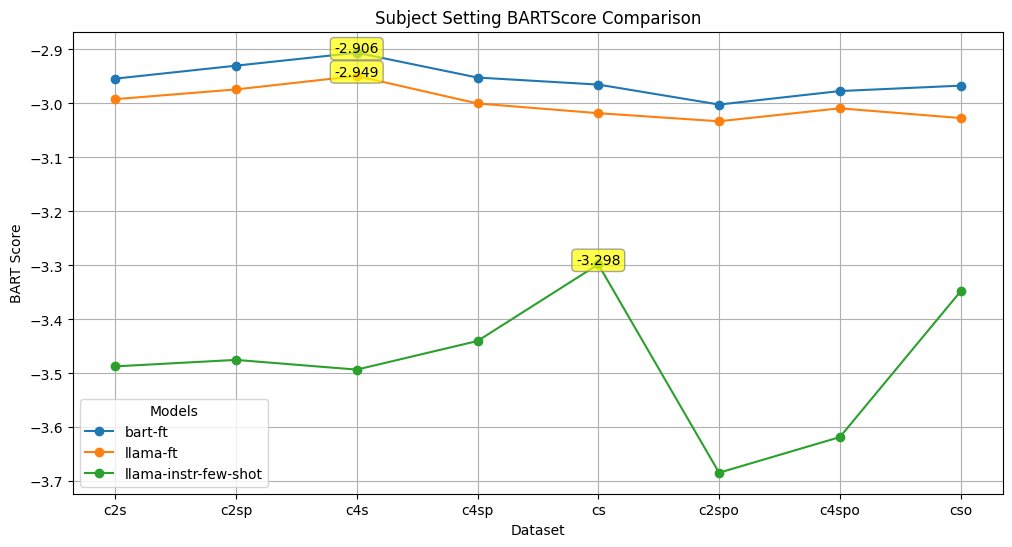

In [45]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='subject-bartscore',
    title="Subject Setting BARTScore Comparison"
)

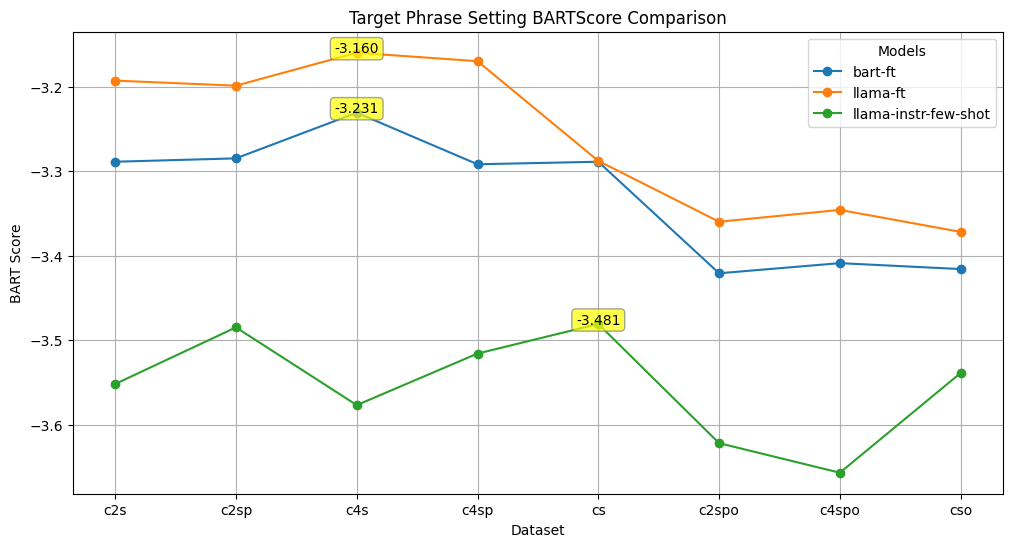

In [46]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-phrase-bartscore',
    title="Target Phrase Setting BARTScore Comparison"
)

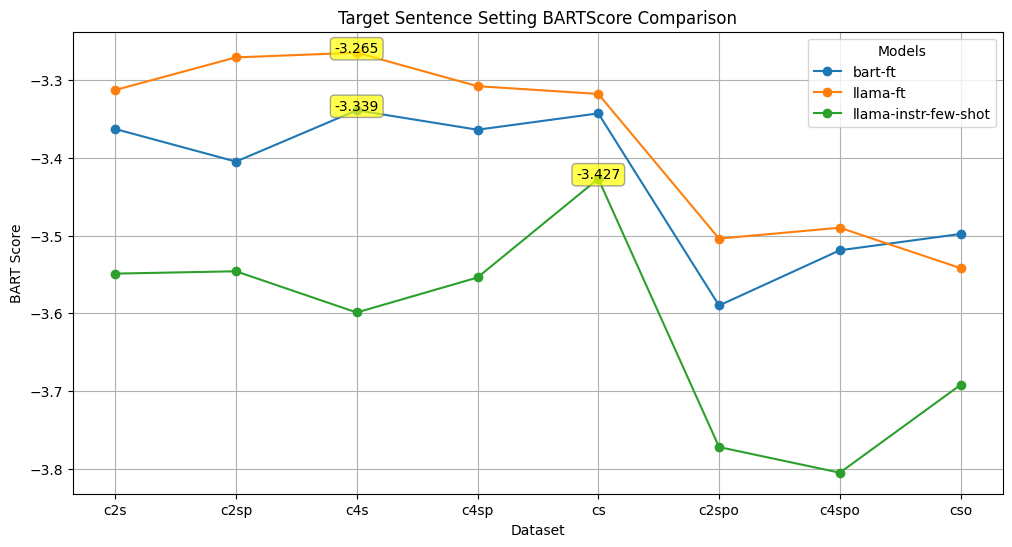

In [47]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-sent-bartscore',
    title="Target Sentence Setting BARTScore Comparison"
)

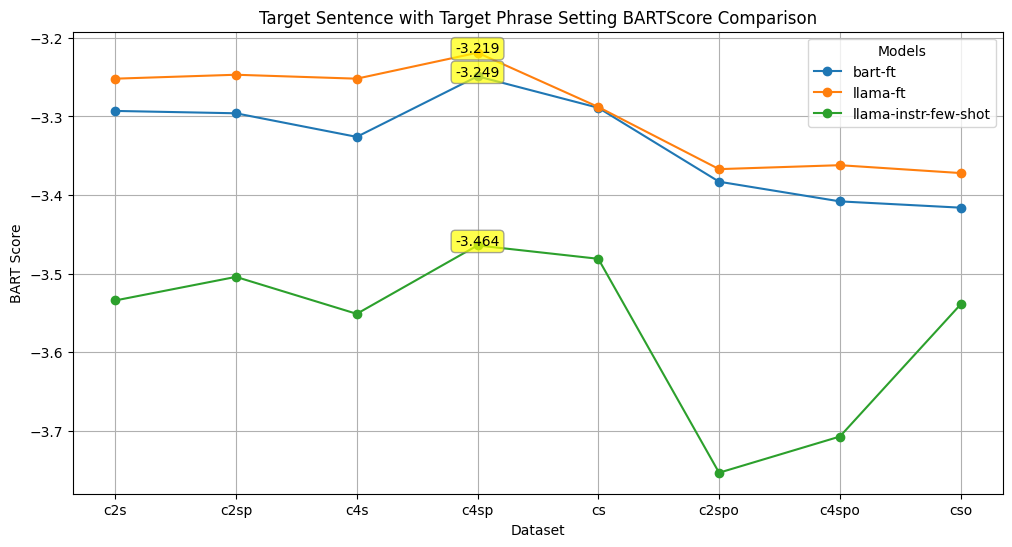

In [48]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-sent-target-bartscore',
    title="Target Sentence with Target Phrase Setting BARTScore Comparison"
)

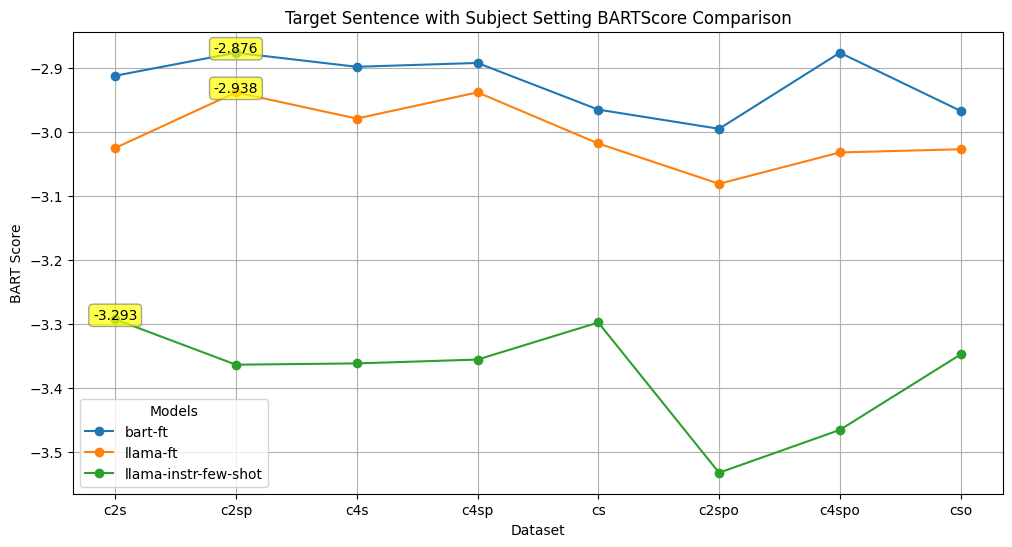

In [49]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-sent-subject-bartscore',
    title="Target Sentence with Subject Setting BARTScore Comparison"
)